- https://blog.quantinsti.com/random-walk/

In [1]:
# dependdencies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# periods to simulate
periods = 50000

In [2]:
# # price data
# #  yahoo finance

# df = yf.download('AAPL','2020-06-01', '2021-01-01', interval='1d')
# df['Close'].plot(figsize=(6,4))
# plt.legend();
# df.tail()

In [3]:
# price data
#  https://www.kaggle.com/imetomi/eur-usd-forex-pair-historical-data-2002-2019?select=eurusd_minute.csv

# read data
df = pd.read_csv('./resources/eurusd_minute.csv', index_col=0, parse_dates=[['Date', 'Time']])
df.drop(['BCh', 'AO', 'AH', 'AL', 'AC', 'ACh'], axis = 1, inplace = True)
df = df.rename(columns={'BO': 'Open', 'BH': 'High', 'BL': 'Low', 'BC': 'Close'})
df.index.names = ['Date']
df

,Open,High,Low,Close
Date,,,,
2005-01-02 18:29:00,1.35550,1.35550,1.35550,1.35550
2005-01-02 18:38:00,1.35550,1.35550,1.35550,1.35550
2005-01-02 18:51:00,1.35620,1.35620,1.35620,1.35620
2005-01-02 18:52:00,1.35600,1.35600,1.35600,1.35600
2005-01-02 18:55:00,1.35630,1.35630,1.35630,1.35630
...,...,...,...,...
2020-04-29 23:55:00,1.08770,1.08770,1.08763,1.08764
2020-04-29 23:56:00,1.08762,1.08762,1.08756,1.08757
2020-04-29 23:57:00,1.08759,1.08761,1.08757,1.08759


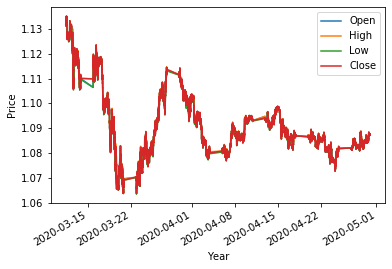

In [4]:
# plotting the real data
df[-periods:].plot(figsize=(6,4),grid=False,legend=True)
plt.xlabel('Year')
plt.ylabel('Price');

In [5]:
# seed value for the calculations
np.random.seed(42)

# characterise the data - percentage change, mean, and sigma
df['daily_pc_op'] = df['Open'].pct_change()
df['daily_pc_hi'] = df['High'].pct_change()
df['daily_pc_lo'] = df['Low'].pct_change()
df['daily_pc_cl'] = df['Close'].pct_change()

mu_op = df['daily_pc_op'].iloc[:-periods].mean()
mu_hi = df['daily_pc_hi'].iloc[:-periods].mean()
mu_lo = df['daily_pc_lo'].iloc[:-periods].mean()
mu_cl = df['daily_pc_cl'].iloc[:-periods].mean()

sigma_op = df['daily_pc_op'].iloc[:-periods].std()
sigma_hi = df['daily_pc_hi'].iloc[:-periods].std()
sigma_lo = df['daily_pc_lo'].iloc[:-periods].std()
sigma_cl = df['daily_pc_cl'].iloc[:-periods].std()


# random walk simulation of a price
simulation = {}
simulation["Simulation_op"] = [df['Open'].iloc[-periods]]
simulation["Simulation_hi"] = [df['High'].iloc[-periods]]
simulation["Simulation_lo"] = [df['Low'].iloc[-periods]]
simulation["Simulation_cl"] = [df['Close'].iloc[-periods]]

for d in range(periods-1):
    simulation["Simulation_op"].append(simulation["Simulation_cl"][-1]*np.exp((mu_op-(sigma_op**2/2))+sigma_op*np.random.normal()))
    simulation["Simulation_hi"].append(simulation["Simulation_cl"][-1]*np.exp((mu_hi-(sigma_hi**2/2))+sigma_hi*np.random.normal()))
    simulation["Simulation_lo"].append(simulation["Simulation_cl"][-1]*np.exp((mu_lo-(sigma_lo**2/2))+sigma_lo*np.random.normal()))
    simulation["Simulation_cl"].append(simulation["Simulation_cl"][-1]*np.exp((mu_cl-(sigma_cl**2/2))+sigma_cl*np.random.normal()))

In [6]:
df['Open']

Date
2005-01-02 18:29:00    1.35550
2005-01-02 18:38:00    1.35550
2005-01-02 18:51:00    1.35620
2005-01-02 18:52:00    1.35600
2005-01-02 18:55:00    1.35630
                        ...   
2020-04-29 23:55:00    1.08770
2020-04-29 23:56:00    1.08762
2020-04-29 23:57:00    1.08759
2020-04-29 23:58:00    1.08758
2020-04-29 23:59:00    1.08761
Name: Open, Length: 5618819, dtype: float64

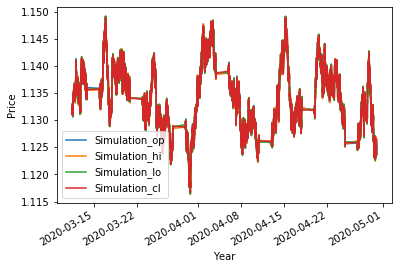

In [7]:
# plotting the simulation
simulation=pd.DataFrame(simulation)
simulation.index=df[-periods:].index
simulation.plot(figsize=(6,4),grid=False,legend=True)
plt.xlabel('Year')
plt.ylabel('Price');

In [8]:
# import plotly.graph_objs as go
# fig = go.Figure(data=[go.Candlestick(
#     x = simulation.index,     
#     open=simulation['Simulation_op'], 
#     high=simulation['Simulation_hi'], 
#     low=simulation['Simulation_lo'], 
#     close=simulation['Simulation_cl']
# )])

# fig.update_layout(
#     title='Google',
#     yaxis_title='Price [USD]',
#     xaxis_rangeslider_visible=True,
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(l=50,r=50,b=100,t=100,pad=4)
# )

# fig.show()

In [9]:
# tidy
simulation = simulation.rename(columns={'Simulation_op': 'Open', 'Simulation_hi': 'High', 'Simulation_lo': 'Low', 'Simulation_cl': 'Close'})
simulation

,Open,High,Low,Close
Date,,,,
2020-03-11 10:12:00,1.131530,1.131570,1.131390,1.131490
2020-03-11 10:13:00,1.131582,1.131466,1.131601,1.131775
2020-03-11 10:14:00,1.131731,1.131735,1.132045,1.131918
2020-03-11 10:15:00,1.131831,1.132011,1.131839,1.131831
2020-03-11 10:16:00,1.131876,1.131503,1.131536,1.131726
...,...,...,...,...
2020-04-29 23:55:00,1.123625,1.123868,1.123802,1.123832
2020-04-29 23:56:00,1.123699,1.123858,1.124040,1.123952
2020-04-29 23:57:00,1.124208,1.123977,1.123967,1.123771


In [10]:
# data to csv
simulation.to_csv('./resources/eurusd_minute_simulated.csv', index=True,)